<a href="https://colab.research.google.com/github/Hyunjiinko/ISYS5001_Weatherwise_Hyunjin-Ko/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [1]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai
!pip install pyinputplus
!pip install requests
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 93.8 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existing

## 📦 Setup and Configuration
Import required packages and setup environment.

In [2]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip

## 🌤️ Weather Data Functions

In [5]:
# Define get_weather_data() function here
weather_cache = {}  # cache dictionary to store previous results
def get_weather_data(location, forecast_days=3):
    if location in weather_cache:
        print(f"(cached) Returning saved data for {location}")
        return weather_cache[location]

    url = f"https://wttr.in/{location}?format=j1"
    try:
        response = requests.get(url, timeout=5)
        response.raise_for_status()
        data = response.json()

        result = {
            "temperature": data["current_condition"][0]["temp_C"],
            "humidity": data["current_condition"][0]["humidity"],
            "forecast": [
                {
                    "date": d["date"],
                    "max_temp": d["maxtempC"],
                    "min_temp": d["mintempC"],
                    # take daily chance of rain from first hourly block
                    "chance_of_rain": d["hourly"][0]["chanceofrain"]
                }
                for d in data["weather"][:forecast_days]
            ]
        }
        weather_cache[location] = result
        return result


    except requests.exceptions.RequestException:
        return {"error": "Failed to fetch weather data. Please check the location or try again later."}


## 📊 Visualisation Functions

In [6]:
# Define create_temperature_visualisation() and create_precipitation_visualisation() here
import matplotlib.pyplot as plt

def create_temperature_visualisation(weather_data, output_type='display'):
    dates = [day["date"] for day in weather_data["forecast"]]
    max_temps = [int(day["max_temp"]) for day in weather_data["forecast"]]
    min_temps = [int(day["min_temp"]) for day in weather_data["forecast"]]

    fig, ax = plt.subplots()
    ax.plot(dates, max_temps, marker='o', label="Max Temp (°C)")
    ax.plot(dates, min_temps, marker='o', label="Min Temp (°C)")

    ax.set_title("Temperature Forecast")
    ax.set_xlabel("Date")
    ax.set_ylabel("Temperature (°C)")
    ax.legend()
    plt.xticks(rotation=45)

    if output_type == 'figure':
        return fig
    else:
        plt.show()


In [7]:
def create_precipitation_visualisation(weather_data, output_type='display'):
    dates = [day["date"] for day in weather_data["forecast"]]
    precipitation = [int(day["chance_of_rain"]) for day in weather_data["forecast"]]

    fig, ax = plt.subplots()
    ax.bar(dates, precipitation, color='skyblue')

    ax.set_title("Precipitation Forecast")
    ax.set_xlabel("Date")
    ax.set_ylabel("Chance of Rain (%)")
    ax.set_ylim(0, 100)  # Always show 0–100%

    # If no rain at all, show a message
    if all(p == 0 for p in precipitation):
        ax.text(0.5, 0.5, "No rain expected",
                ha='center', va='center', fontsize=12, color='green',
                transform=ax.transAxes)

    plt.xticks(rotation=45)

    if output_type == 'figure':
        return fig
    else:
        plt.show()

In [8]:
def compare_cities_weather(city1, city2):
    """
    Compare 3-day temperature forecasts between two cities.
    """
    data1 = get_weather_data(city1)
    data2 = get_weather_data(city2)

    if "error" in data1 or "error" in data2:
        print("Error fetching one or both city data.")
        return

    dates = [day["date"] for day in data1["forecast"]]
    temps1 = [int(day["max_temp"]) for day in data1["forecast"]]
    temps2 = [int(day["max_temp"]) for day in data2["forecast"]]

    plt.figure(figsize=(8, 4))
    plt.plot(dates, temps1, marker='o', label=f"{city1} Max Temp")
    plt.plot(dates, temps2, marker='o', label=f"{city2} Max Temp")
    plt.title(f"Temperature Comparison: {city1} vs {city2}")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.grid(True)
    plt.show()

## 🤖 Natural Language Processing

In [10]:
import re

def parse_weather_question(question):
    question = question.lower()

    # defaults
    location = None
    time_period = "today"
    attribute = "temperature"

    # detect time
    if "tomorrow" in question:
        time_period = "tomorrow"
    elif "today" in question:
        time_period = "today"

    # detect attribute
    if "rain" in question:
        attribute = "chance_of_rain"
    elif "temperature" in question or "hot" in question or "cold" in question:
        attribute = "temperature"

    # extract location after "in"
    words = question.split(" in ")
    if len(words) > 1:
        location = words[1]
        # clean up location (remove "today", "tomorrow", punctuation)
        location = re.sub(r"\b(today|tomorrow)\b", "", location)
        location = re.sub(r"[^\w\s]", "", location)  # remove punctuation
        location = location.strip().title()
    else:
        location = "Perth"  # fallback if no location provided

    return {"location": location, "time_period": time_period, "attribute": attribute}

def generate_weather_response(parsed_question, weather_data):
    if "error" in weather_data:
        return weather_data["error"]

    location = parsed_question["location"]
    time_period = parsed_question["time_period"]
    attribute = parsed_question["attribute"]

    forecast = weather_data["forecast"][0]
    if time_period == "tomorrow" and len(weather_data["forecast"]) > 1:
        forecast = weather_data["forecast"][1]

    # Basic Response
    if attribute == "chance_of_rain":
        response = f"Looks like {location} {time_period} has a {forecast['chance_of_rain']}% chance of rain."
    elif attribute == "temperature":
        response = f"In {location} {time_period}, expect temperatures between {forecast['min_temp']}°C and {forecast['max_temp']}°C."
    else:
        response = f"Here’s the forecast for {location} {time_period}."

    # Advanced: automatic summary sentences
    avg_temp = (int(forecast["max_temp"]) + int(forecast["min_temp"])) / 2
    rain = int(forecast["chance_of_rain"])

    summary = ""
    if rain > 70:
        summary = " It’s likely to rain today, so take an umbrella! ☔"
    elif avg_temp > 28:
        summary = " It will be quite hot — stay hydrated! ☀️"
    elif avg_temp < 10:
        summary = " Expect a chilly day, dress warmly. ❄️"
    else:
        summary = " The weather looks mild and pleasant. 🌤️"

    return response + summary


## 🧭 User Interface

In [11]:
# Define menu functions using pyinputplus or ipywidgets here
import pyinputplus as pyip

def main_menu():
    while True:
        print("\n=== Weather Advisor ===")
        choice = pyip.inputMenu(
            ["Check Weather", "View Visualisation", "Exit"],
            numbered=True
        )

        if choice == "Check Weather":
            city = pyip.inputStr("Enter a city: ")
            q = f"What is the temperature in {city} today?"
            parsed = parse_weather_question(q)
            data = get_weather_data(parsed["location"])
            print(generate_weather_response(parsed, data))

        elif choice == "View Visualisation":
            city = pyip.inputStr("Enter a city: ")
            data = get_weather_data(city)
            create_temperature_visualisation(data)
            create_precipitation_visualisation(data)

        elif choice == "Exit":
            print("Goodbye! 👋")
            break


## 🧩 Main Application Logic

In [12]:
# Tie everything together here
import pyinputplus as pyip

def main_app():
    while True:
        print("\n=== WeatherWise Advisor ===")
        choice = pyip.inputMenu(
            ["Ask a weather question", "View visualisations", "Compare Two Cities", "Exit"],
            numbered=True
        )

        # 1️⃣ User Question -> Weather answer
        if choice == "Ask a weather question":
            question = pyip.inputStr("Enter your weather question: ")
            parsed = parse_weather_question(question)
            data = get_weather_data(parsed["location"])
            response = generate_weather_response(parsed, data)
            print(response)

        # Visulaization function
        elif choice == "View visualisations":
            city = pyip.inputStr("Enter a city: ")
            data = get_weather_data(city)
            create_temperature_visualisation(data)
            create_precipitation_visualisation(data)

        # Added comparing two cities function
        elif choice == "Compare Two Cities":
            city1 = pyip.inputStr("Enter the first city: ")
            city2 = pyip.inputStr("Enter the second city: ")
            compare_cities_weather(city1, city2)

        # Exit
        elif choice == "Exit":
            print("Goodbye! 👋 Stay weather-wise!")
            break


## 🧪 Testing and Examples

In [13]:
#Weather Data Functions
print(get_weather_data("New York"))

{'temperature': '17', 'humidity': '80', 'forecast': [{'date': '2025-10-19', 'max_temp': '25', 'min_temp': '9', 'chance_of_rain': '0'}, {'date': '2025-10-20', 'max_temp': '19', 'min_temp': '13', 'chance_of_rain': '0'}, {'date': '2025-10-21', 'max_temp': '17', 'min_temp': '12', 'chance_of_rain': '0'}]}


(cached) Returning saved data for New York


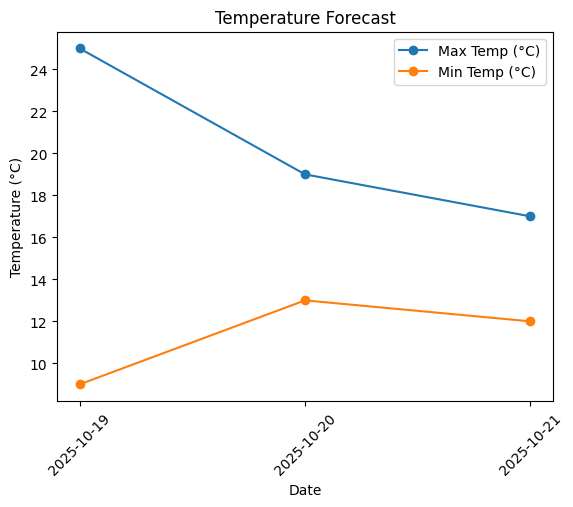

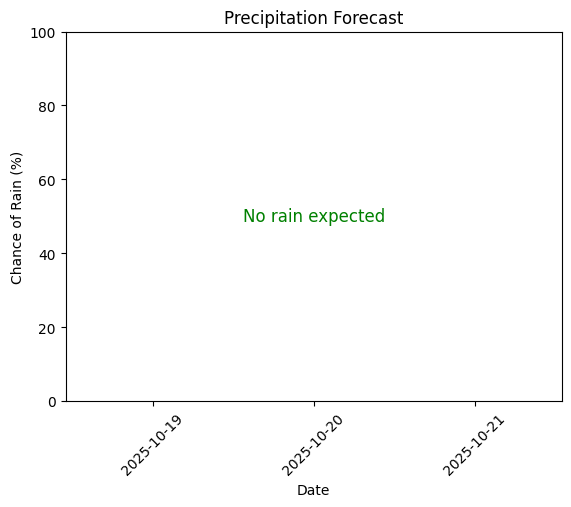

In [14]:
#Visualisation Functions
data = get_weather_data("New York")

create_temperature_visualisation(data)
create_precipitation_visualisation(data)

In [15]:
#Natural Language Processing
q = "What's the temperature in New York today?"
parsed = parse_weather_question(q)
print(parsed)

data = get_weather_data(parsed["location"])
print(generate_weather_response(parsed, data))

{'location': 'New York', 'time_period': 'today', 'attribute': 'temperature'}
(cached) Returning saved data for New York
In New York today, expect temperatures between 9°C and 25°C. The weather looks mild and pleasant. 🌤️


(cached) Returning saved data for New York


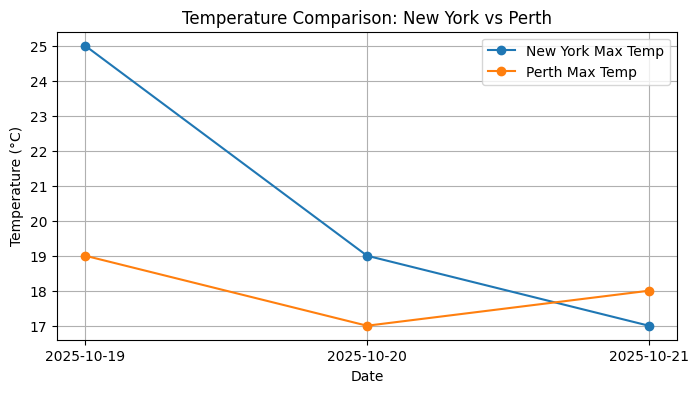

In [16]:
#Multi-City Comparison Test
compare_cities_weather("New York", "Perth")

In [17]:
#Caching Test
print()
get_weather_data("Perth")
get_weather_data("Perth")


(cached) Returning saved data for Perth
(cached) Returning saved data for Perth


{'temperature': '11',
 'humidity': '87',
 'forecast': [{'date': '2025-10-19',
   'max_temp': '19',
   'min_temp': '14',
   'chance_of_rain': '81'},
  {'date': '2025-10-20',
   'max_temp': '17',
   'min_temp': '13',
   'chance_of_rain': '0'},
  {'date': '2025-10-21',
   'max_temp': '18',
   'min_temp': '11',
   'chance_of_rain': '100'}]}

In [20]:
#Edge Case Test
print()
invalid = get_weather_data("!!")
print(invalid)


{'error': 'Failed to fetch weather data. Please check the location or try again later.'}


In [23]:
#User Interface
main_menu()


=== Weather Advisor ===
Please select one of the following:
1. Check Weather
2. View Visualisation
3. Exit
Exit
Goodbye! 👋


In [ ]:
#Main Application Logic - Run this cell to start the interactive WeatherWise app
main_app()

In [22]:
#Main Menu System Test
print()
main_app()



=== WeatherWise Advisor ===
Please select one of the following:
1. Ask a weather question
2. View visualisations
3. Compare Two Cities
4. Exit
Exit
Goodbye! 👋 Stay weather-wise!
